In [98]:
import pandas as pd
import numpy as np
from scipy.signal import stft
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
def normalize_array(arr):
    arr = np.array(arr)
    min_val = np.min(arr)
    max_val = np.max(arr)
    normalized_arr = arr / max_val
    return normalized_arr

In [100]:
df = pd.read_csv("shivang51.csv",header=None)

In [101]:
df.head()

0       1       2       3  4  5  6  7
0  300074  233255  180406  170009  0  0  0  0
1  300107  233298  180506  170026  0  0  0  0
2  300069  233186  180483  170026  0  0  0  0
3  300029  233094  180408  170018  0  0  0  0
4  300065  233188  180442  170023  0  0  0  0

In [102]:
df.drop(df.columns[[4,5,6,7]],axis=1,inplace=True)
df.head()

0       1       2       3
0  300074  233255  180406  170009
1  300107  233298  180506  170026
2  300069  233186  180483  170026
3  300029  233094  180408  170018
4  300065  233188  180442  170023

In [103]:
len(df)

23446

In [104]:
start_index = df[df[0].str.startswith('start ')].index[0]
end_index = df[df[0].str.startswith('end ')].index[0]

start_event_name = df.at[start_index, 0].split(' ')[1]
end_event_name = df.at[end_index, 0].split(' ')[1]

# Extract rows between the event markers
rows_between_events = df.loc[start_index+1:end_index-1]

print("Start Event:", start_event_name)
print("End Event:", end_event_name)
print("Rows between events:")
print(rows_between_events)

Start Event: four.jpg
End Event: four.jpg
Rows between events:
           0       1       2       3
2433  294661  208793  160041  152781
2434  294657  208580  160023  152728
2435  294526  208397  159908  152618
2436  294615  208615  159923  152688
2437  294651  208786  159959  152751
...      ...     ...     ...     ...
3708  293016  200524  153127  142374
3709  293029  200518  153078  142368
3710  293004  200671  153034  142386
3711  292971  200769  153025  142414
3712  292975  200675  153038  142426

[1280 rows x 4 columns]


In [105]:
# narray = normalize_array([int(rows_between_events.iloc[i,0]) for i in range(len(rows_between_events)) ])

In [106]:
narray = normalize_array(np.array(rows_between_events,dtype=int))

In [107]:
narray

array([[0.99986427, 0.70849098, 0.54306229, 0.51842715],
       [0.9998507 , 0.70776821, 0.54300121, 0.51824731],
       [0.99940618, 0.70714724, 0.54261099, 0.51787405],
       ...,
       [0.99424162, 0.68093084, 0.51928565, 0.48315411],
       [0.99412964, 0.68126338, 0.51925511, 0.48324912],
       [0.99414322, 0.68094441, 0.51929922, 0.48328984]])

In [108]:
narray.shape

(1280, 4)

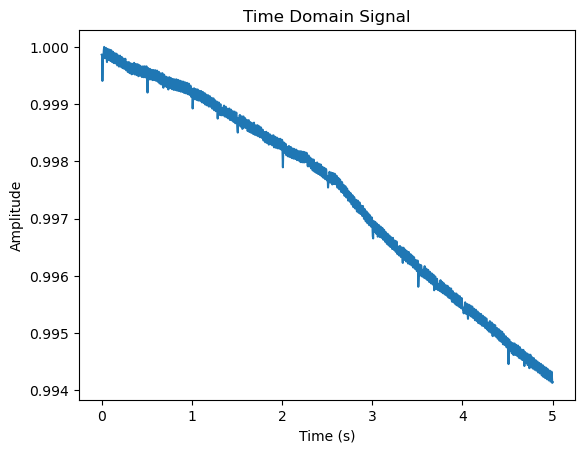

In [109]:
plt.plot(np.linspace(0,5,num=len(narray)),narray[:,0])
plt.title("Time Domain Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Sampling Frequency

In [110]:
fs = len(narray[:,0])//5
fs

256

In [111]:
dfft = np.fft.fft(narray[:,0])
dfft

array([ 1.27666997e+03+0.j        , -1.82754917e-01-1.26179259j,
        4.42885985e-03-0.57343397j, ..., -3.32107285e-02+0.38397824j,
        4.42885985e-03+0.57343397j, -1.82754917e-01+1.26179259j])

In [112]:
# n=len(narray)
# freq = np.fft.fftfreq(n, 1/fs)
# positive_freq_indices = np.where(freq >= 0)

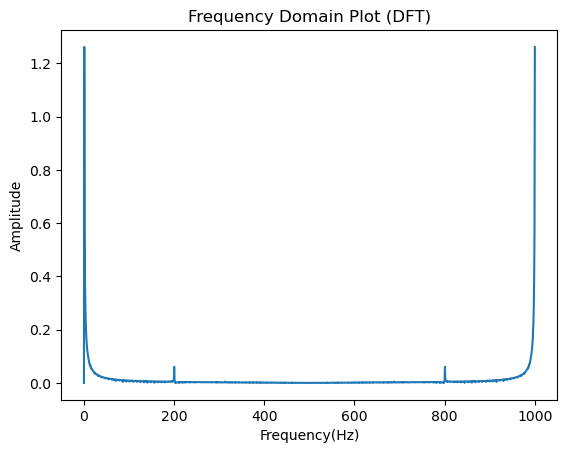

In [172]:
# plt.plot(freq[positive_freq_indices],np.abs(dfft[positive_freq_indices]))
plt.plot(np.linspace(0,fs,num=len(dfft)),np.abs(dfft.imag))
plt.title("Frequency Domain Plot (DFT)")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Amplitude")
plt.show()

In [114]:
def low_pass(array,cutoff):
    arr = array.copy()
    arr = np.fft.fft(arr)
    arr[:cutoff]=0
    arr = np.fft.ifft(arr)
    return arr
    
def high_pass(array,cutoff):
    arr = array.copy()
    arr = np.fft.fft(arr)
    arr[cutoff:]=0
    arr = np.fft.ifft(arr)
    return arr

def band_pass(arr,lc,hc):
    return high_pass(low_pass(arr,lc),hc)

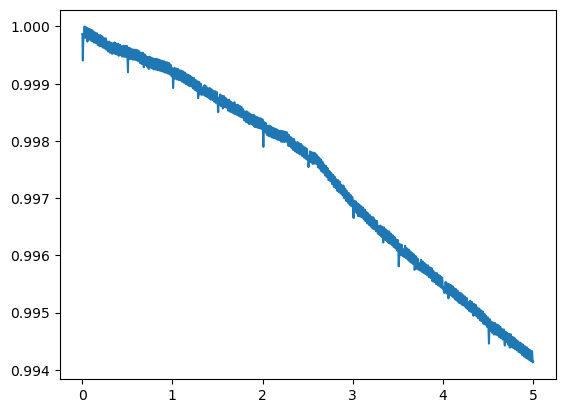

In [115]:
plt.plot(np.linspace(0,5,num=len(narray[:,0])),narray[:,0])

In [129]:
narray = band_pass(narray,8,500)

In [167]:
f,t,Zxx = stft(narray[:,0],fs=fs,nperseg=2048)
#(f,t,Zxx)
(f.shape,t.shape,Zxx.shape,narray[:,0].shape)

/tmp/ipykernel_49095/656116478.py:1: UserWarning: Input data is complex, switching to return_onesided=False
  f,t,Zxx = stft(narray[:,0],fs=fs,nperseg=2048)


((1280,), (3,), (1280, 3), (1280,))

/tmp/ipykernel_49095/1507482626.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))
/tmp/ipykernel_49095/1507482626.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))


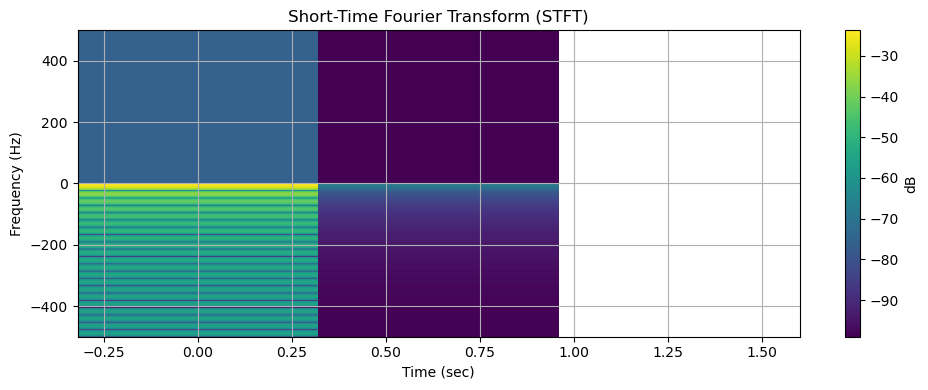

In [168]:
plt.figure(figsize=(10,4))
# plt.pcolormesh(t, f,np.abs(Zxx))
# plt.pcolormesh(t, f, 10 * np.log10(Sxx))
# plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))
plt.title("Short-Time Fourier Transform (STFT)")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.grid(True)
plt.tight_layout()
plt.show()

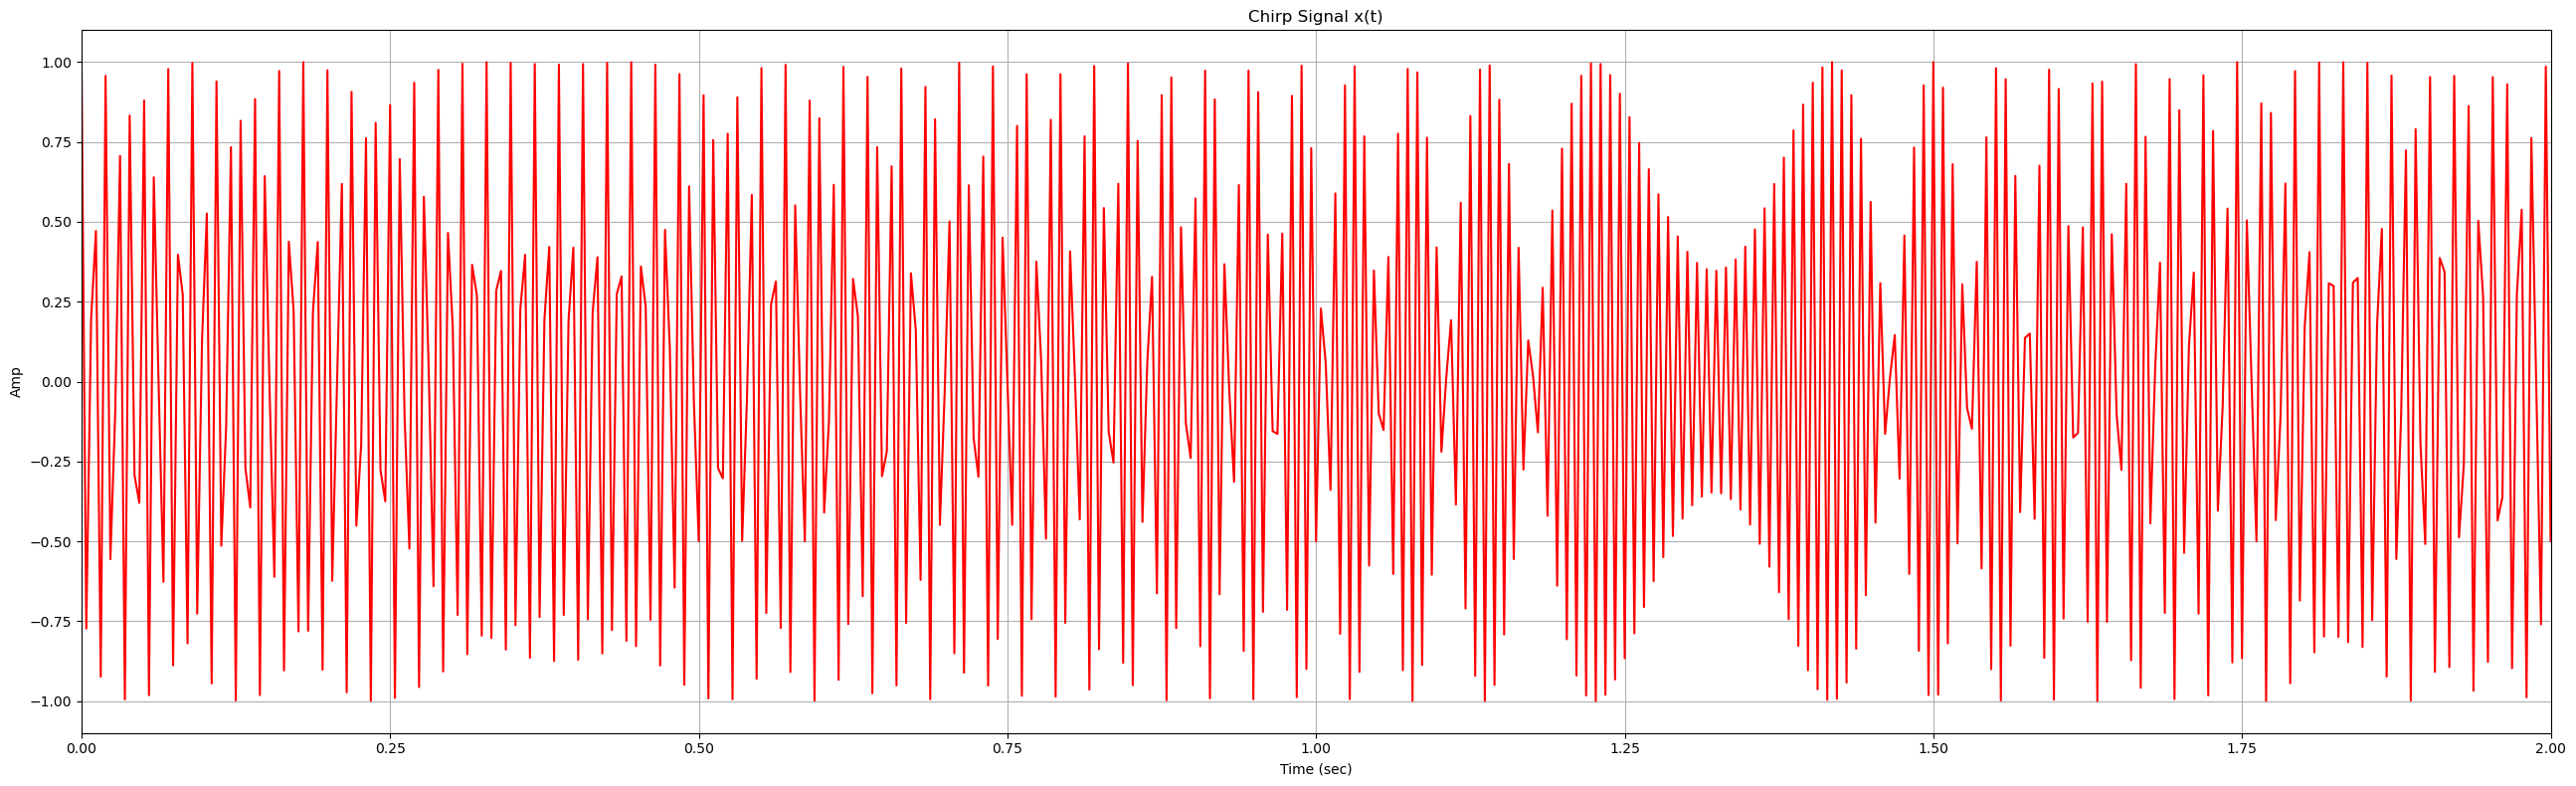

In [118]:
from scipy.signal import chirp,get_window,spectrogram
T = 5.0  # sec
fs = 256  # Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz
beta = 100
f_t = f0 + beta * t**2

x_t = chirp(t, f0=f0, f1=500, t1=T, method='quadratic')
x_t2= np.cos(2 * np.pi * f_t * t)

plt.figure(figsize=(26, 8))
plt.plot(t, x_t, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()

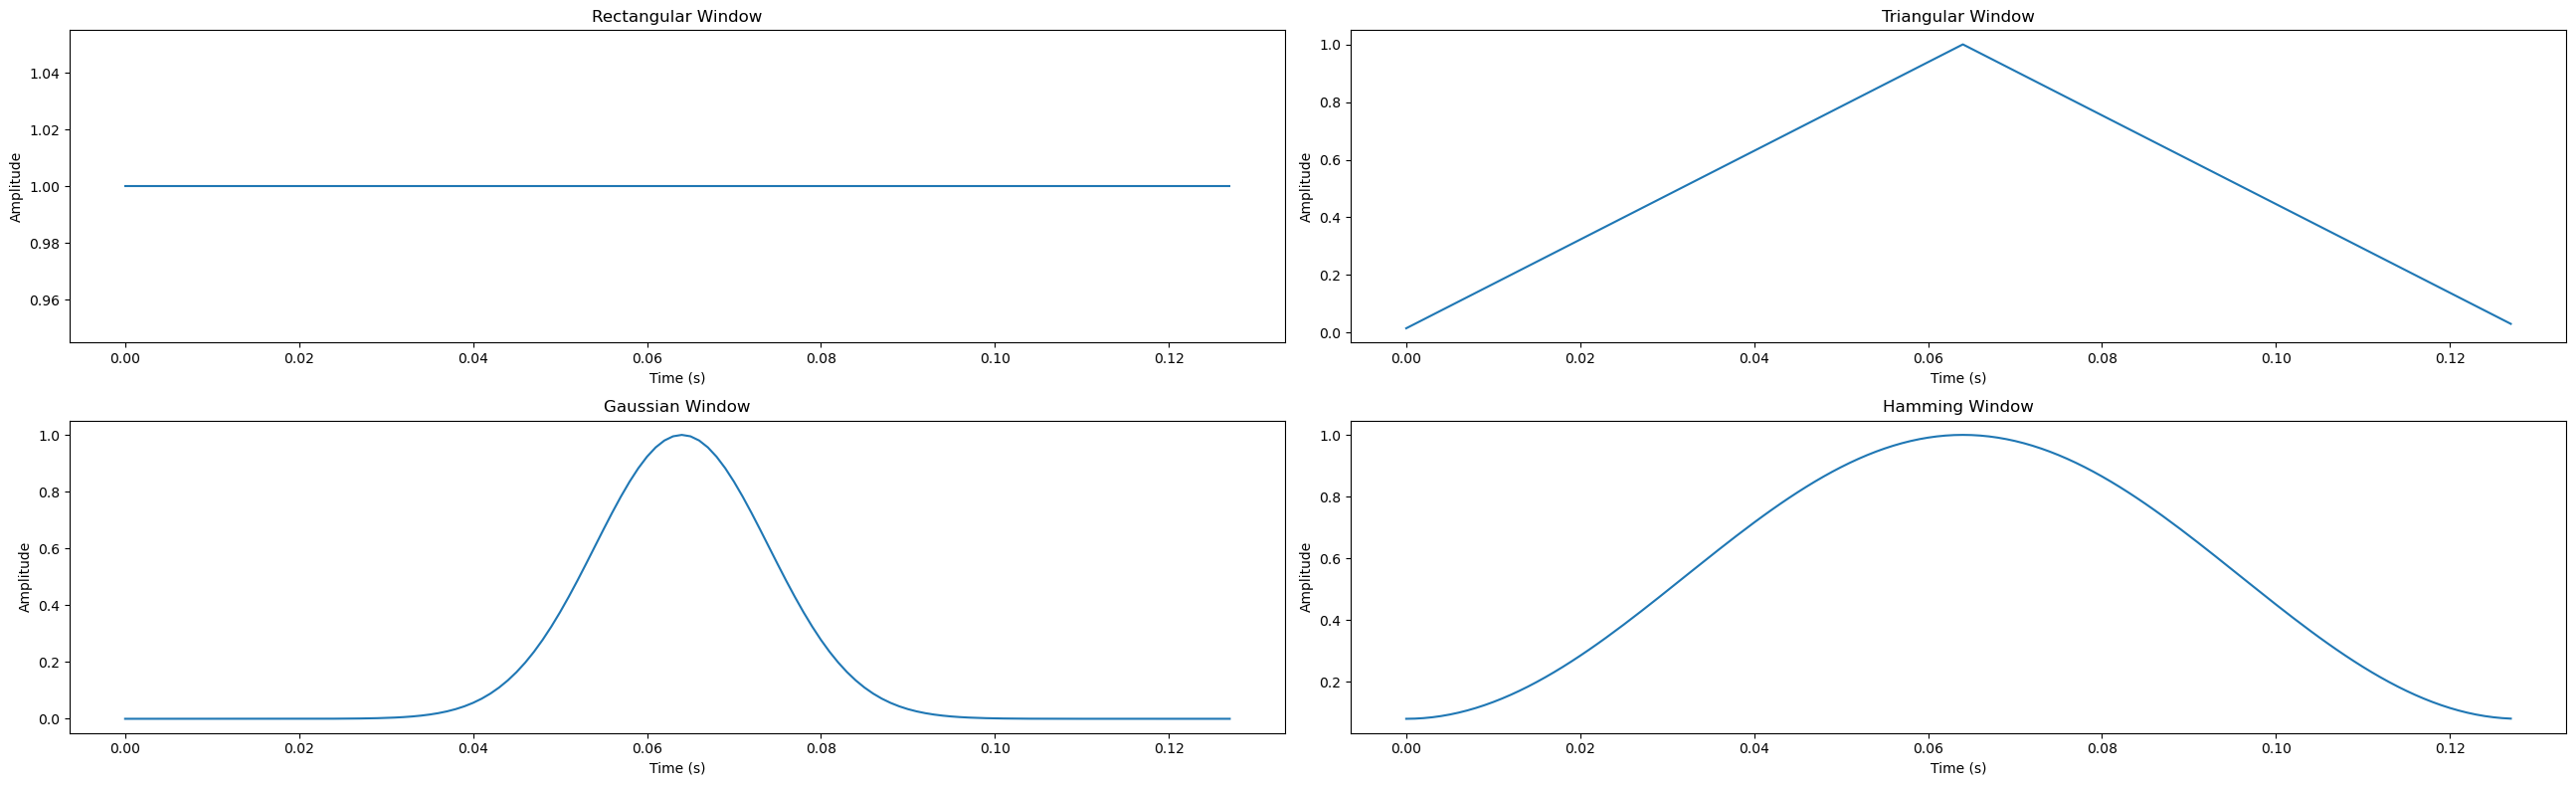

In [119]:
L = 128
fs = 1000  # Hz
std = 10 # for gaussian

rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

/tmp/ipykernel_49095/2025535871.py:12: RuntimeWarning: divide by zero encountered in log10
  X_dB = 20 * np.log10(X_mag) #better visualize the amplitude differences across frequencies


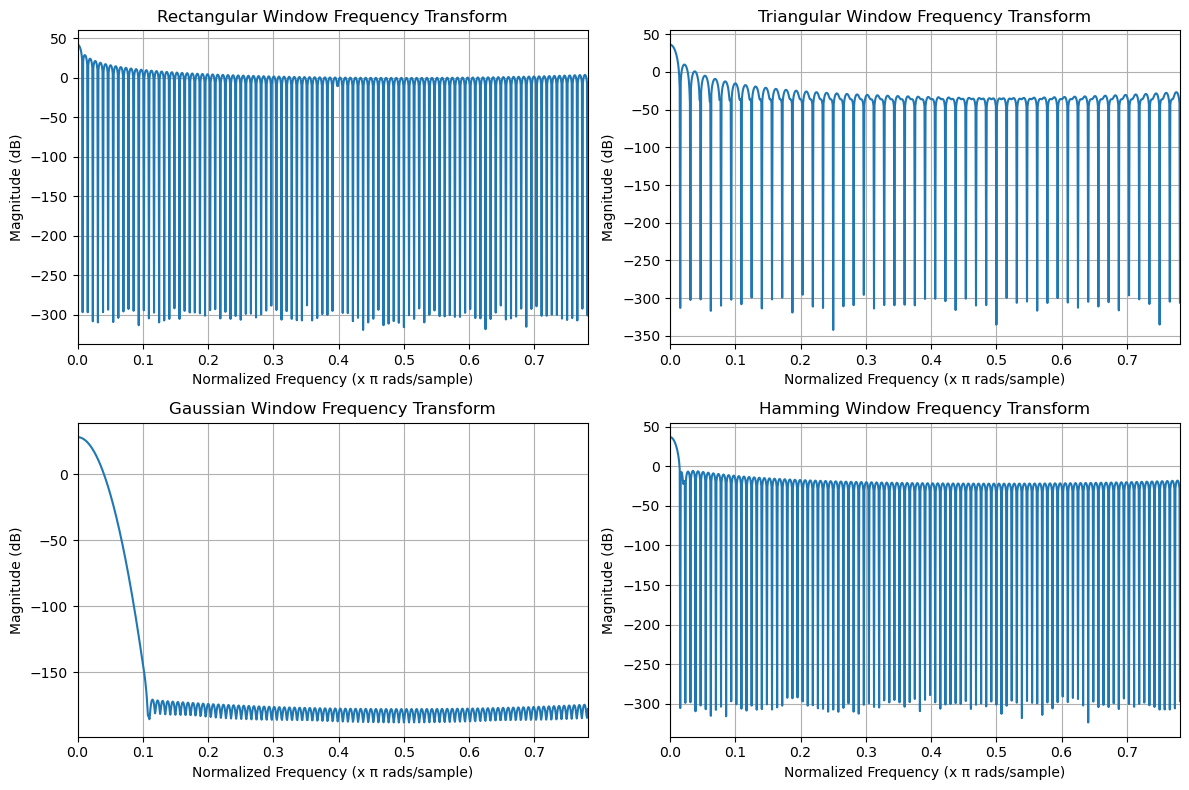

In [120]:
def normalized_frequency_axis(N):
    return np.arange(N) / N

N = len(x_t)
plt.figure(figsize=(12, 8))
cnt = 1
names = ["Rectangular", "Triangular", "Gaussian", "Hamming"]
for i in [rectangular_window, triangular_window, gauss_window, hamming_window]:
    X = np.fft.fft(i, N)
    X_mag = np.abs(X)

    X_dB = 20 * np.log10(X_mag) #better visualize the amplitude differences across frequencies

    freq_axis = normalized_frequency_axis(N)

    plt.subplot(2, 2, cnt)
    plt.plot(freq_axis, X_dB)  #This tells us how strong each frequency component is in the signal. A higher amplitude means that frequency is more dominant
    plt.title('{} Window Frequency Transform'.format(names[cnt-1]))
    plt.xlabel('Normalized Frequency (x π rads/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim([0, freq_axis[1000]])
    cnt += 1

plt.tight_layout()
plt.show()

/tmp/ipykernel_49095/3496370077.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


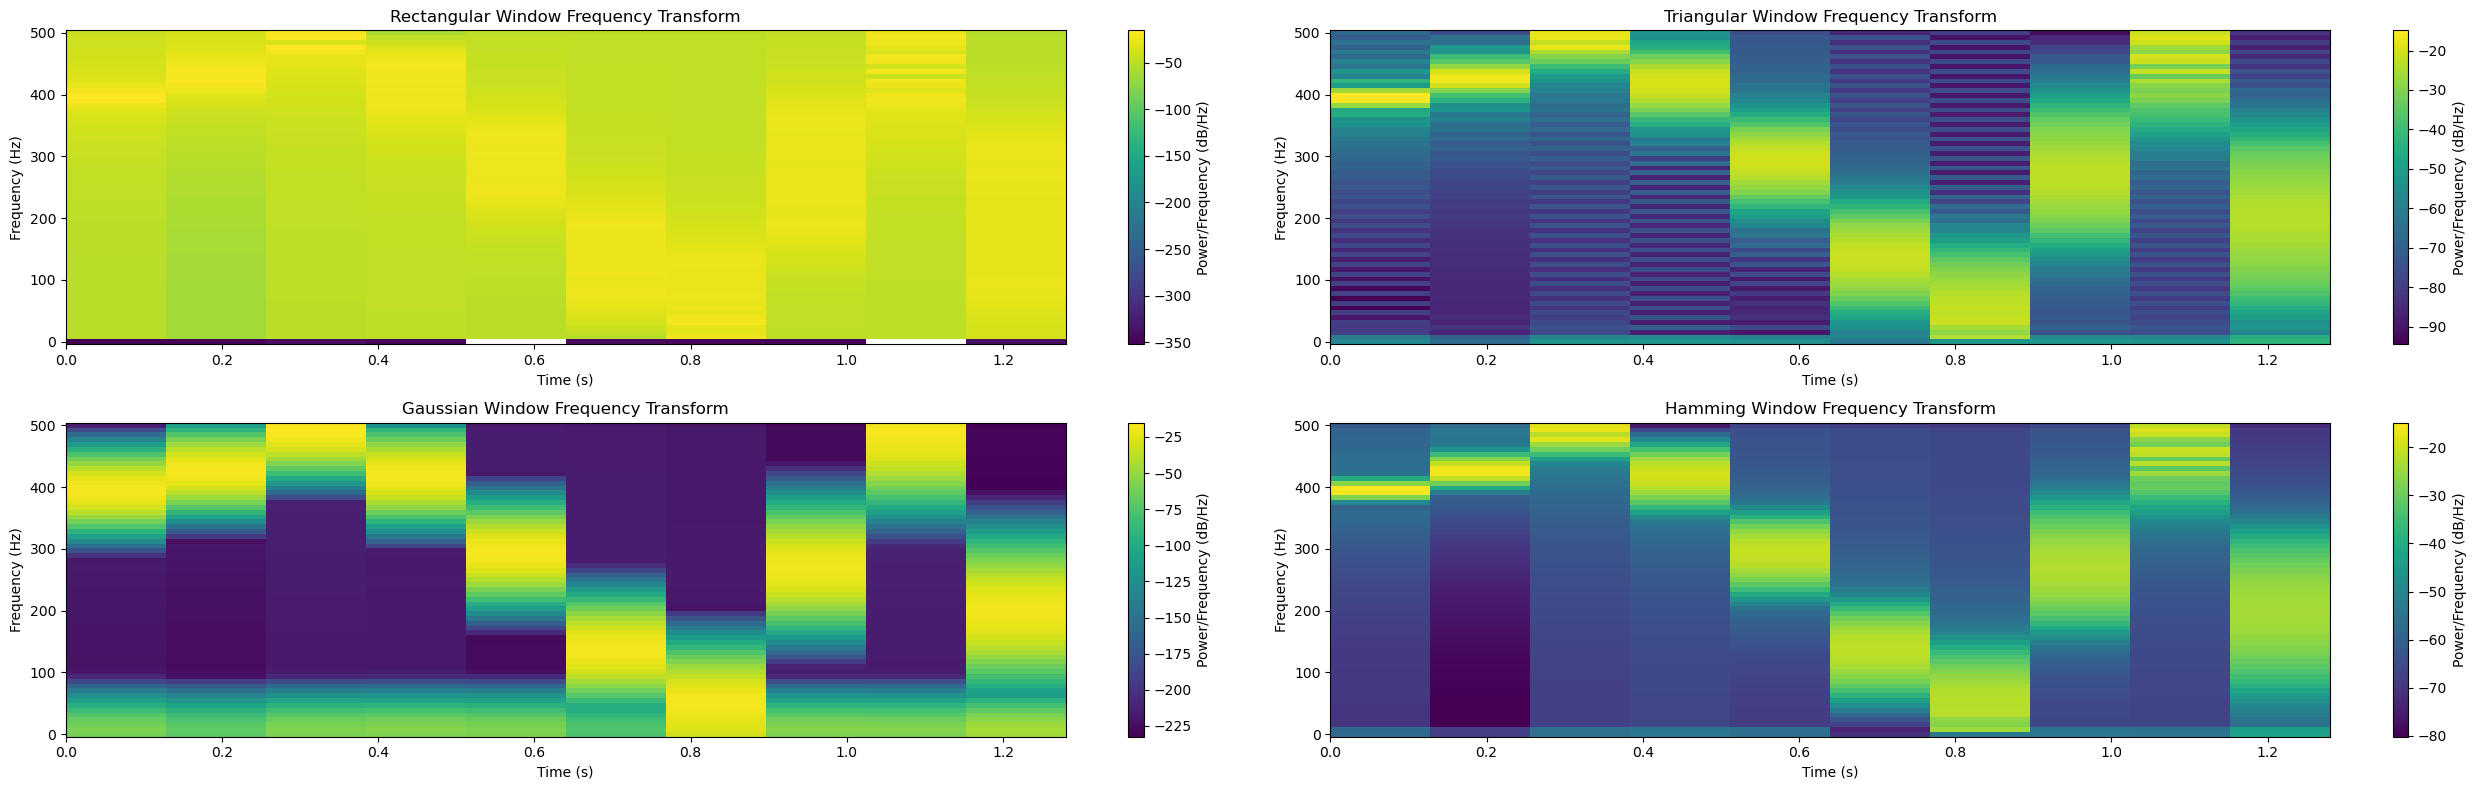

In [121]:
noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()

/tmp/ipykernel_49095/1196699853.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


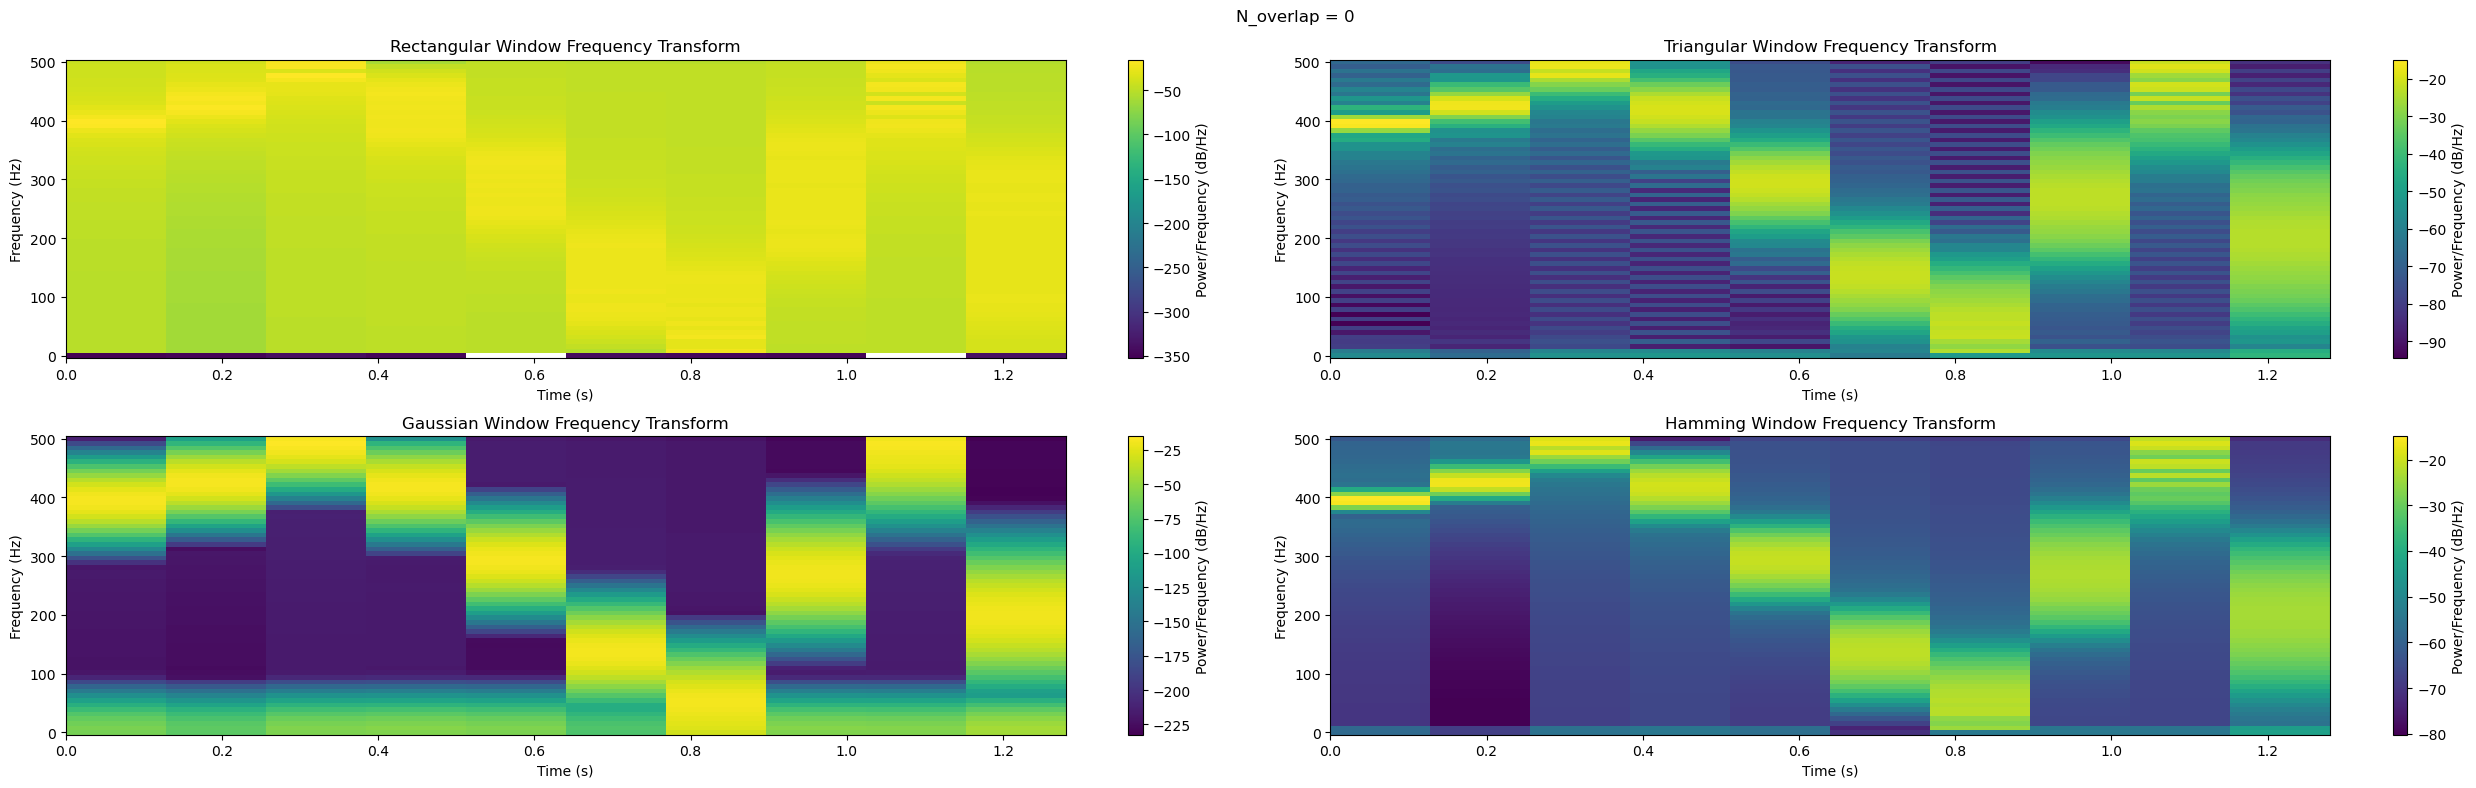

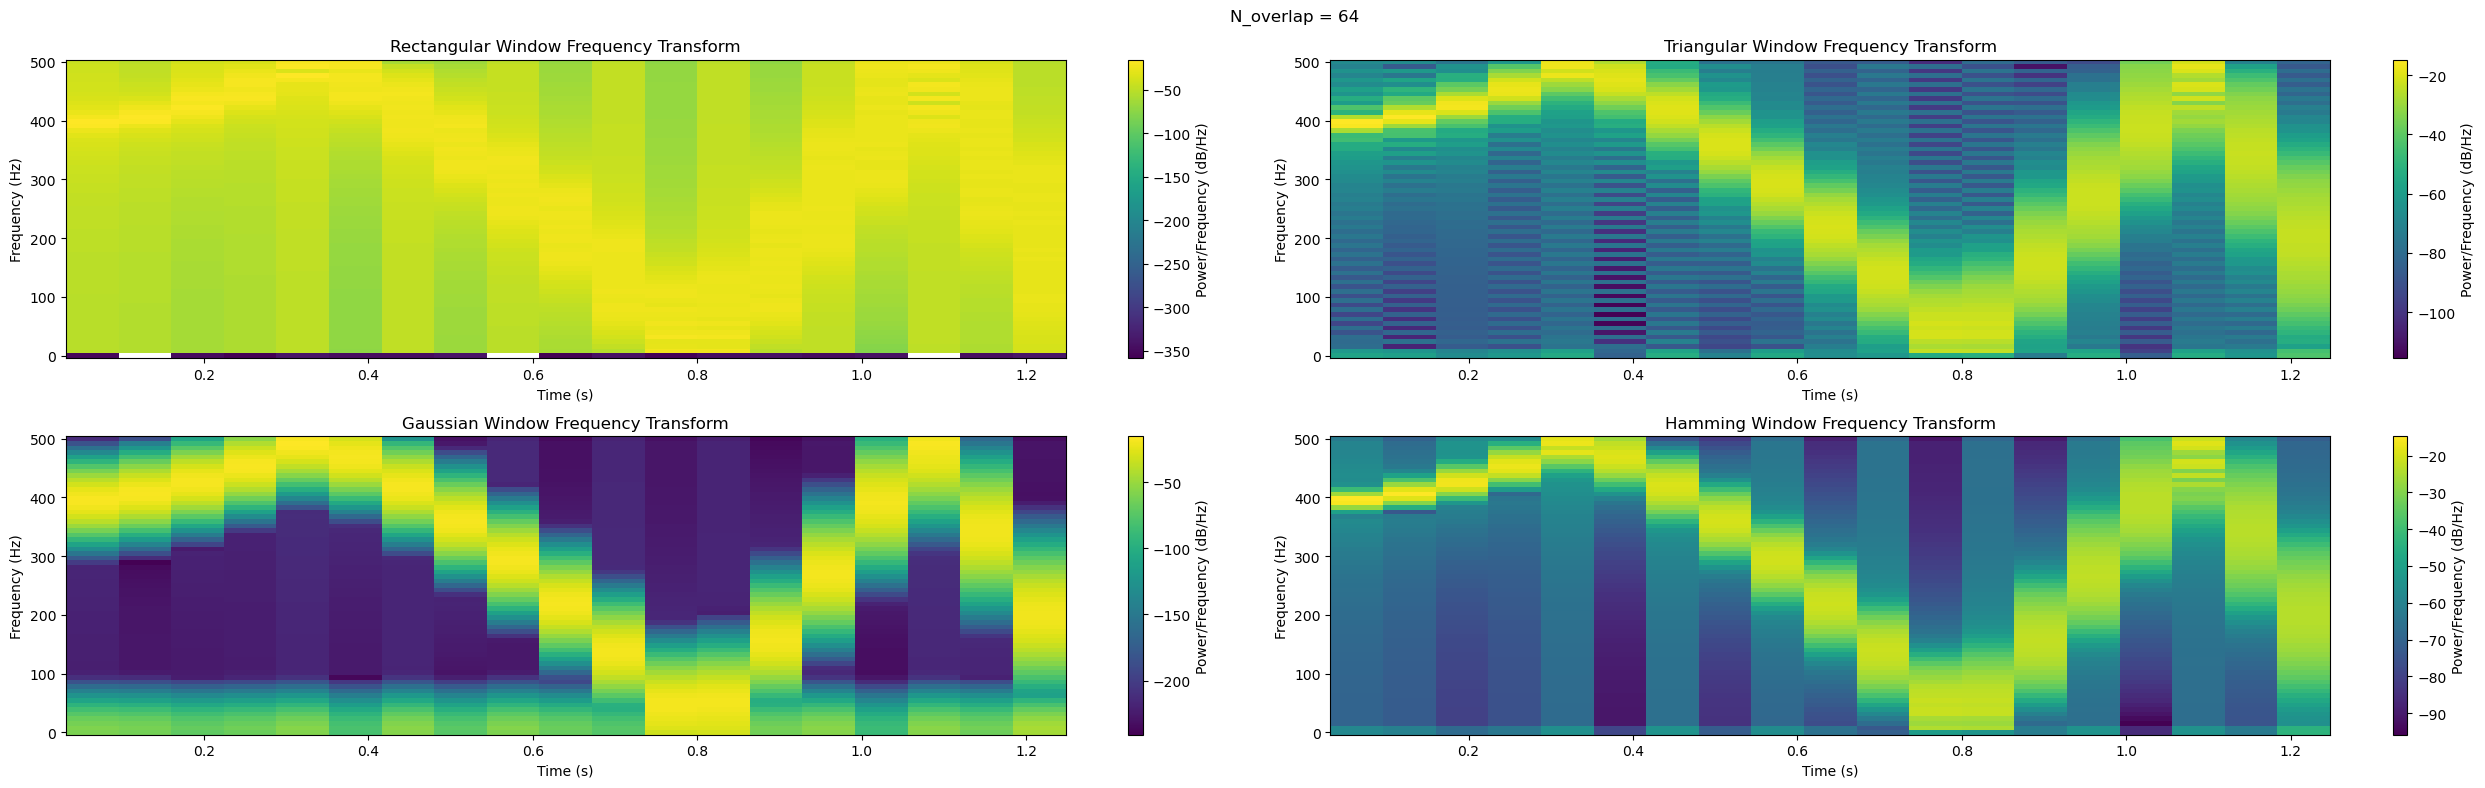

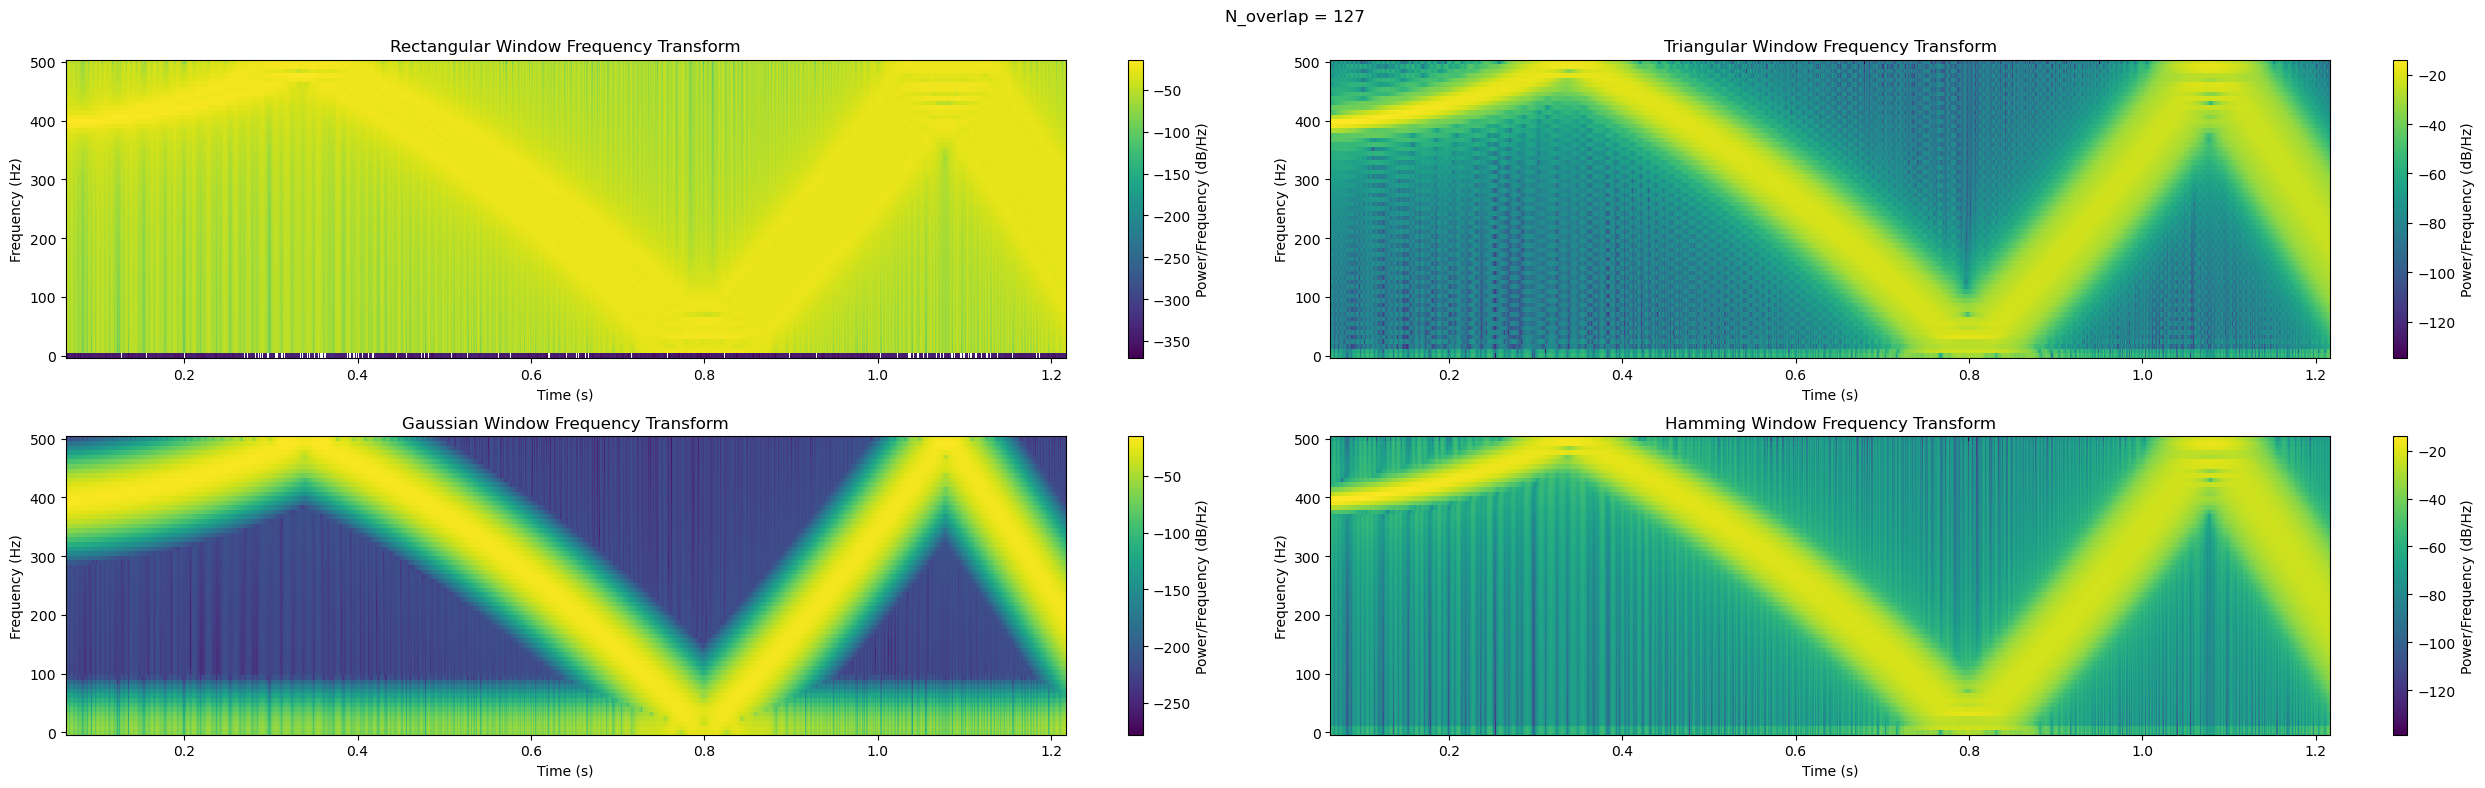

In [122]:
noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_49095/1710948960.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


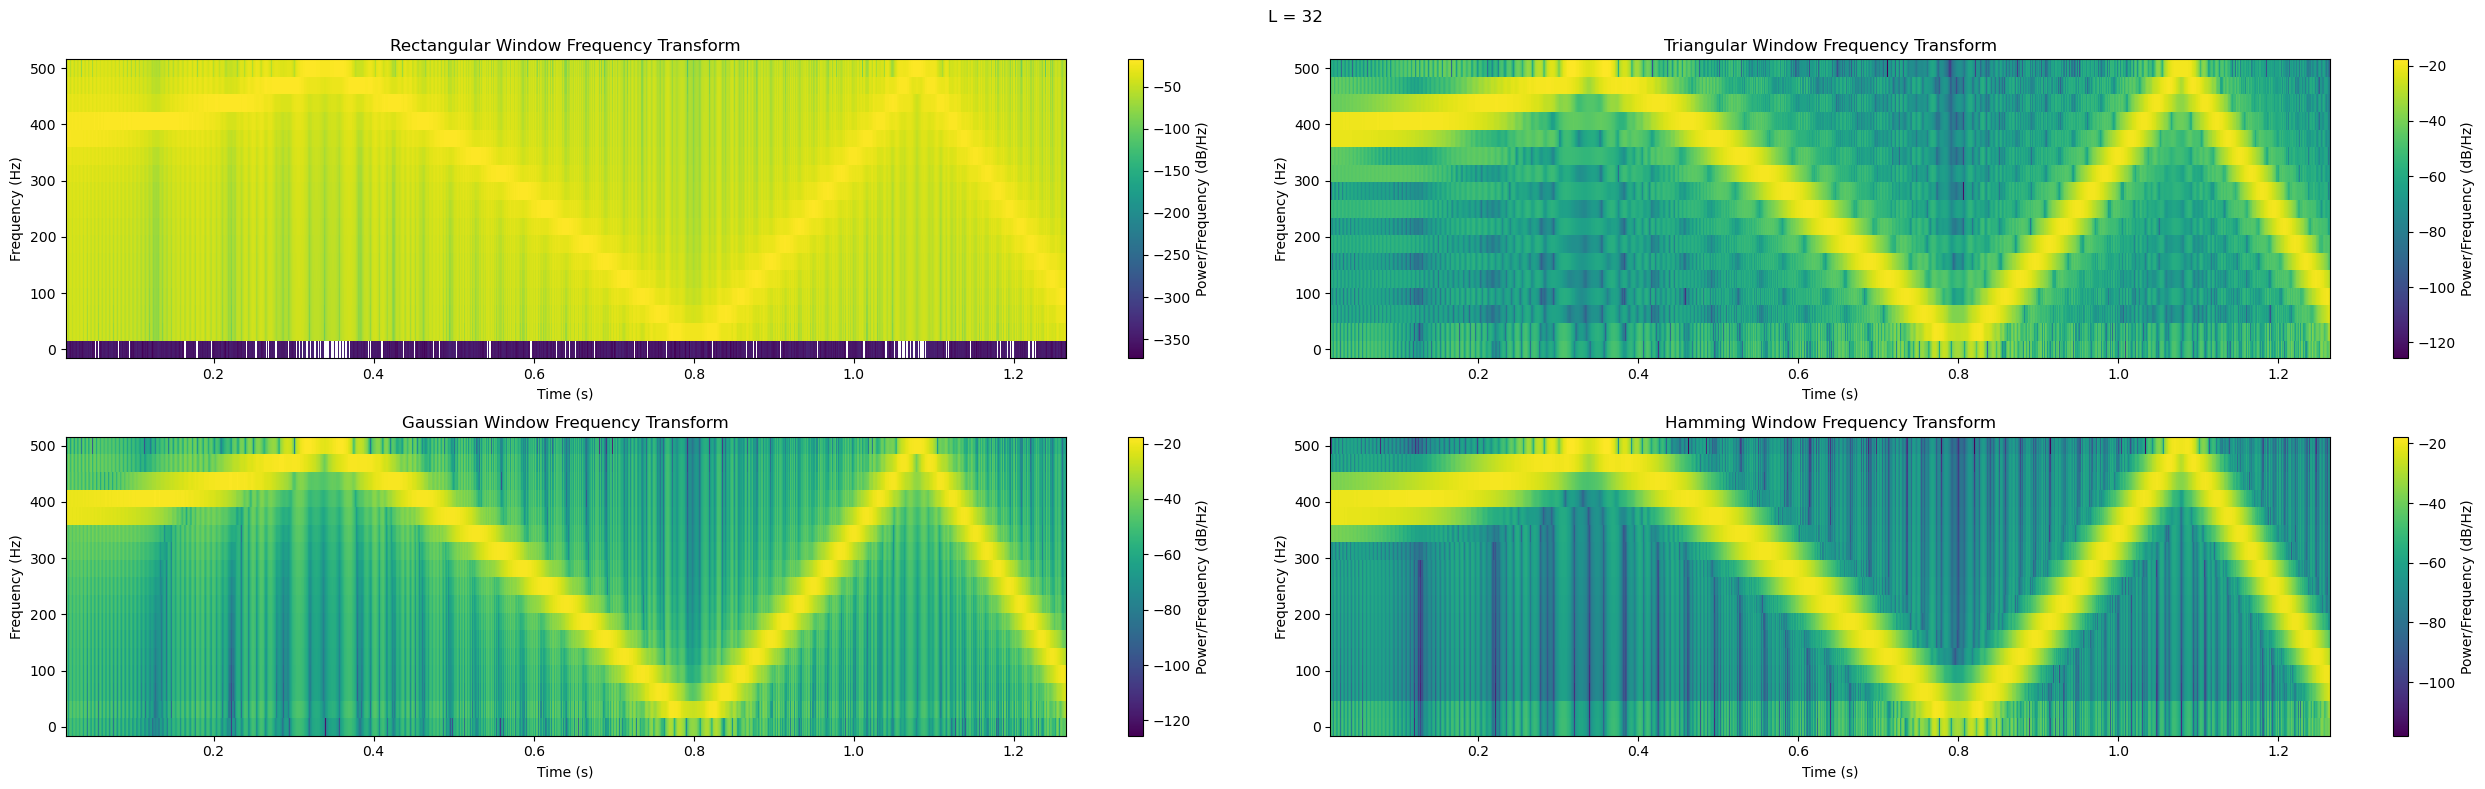

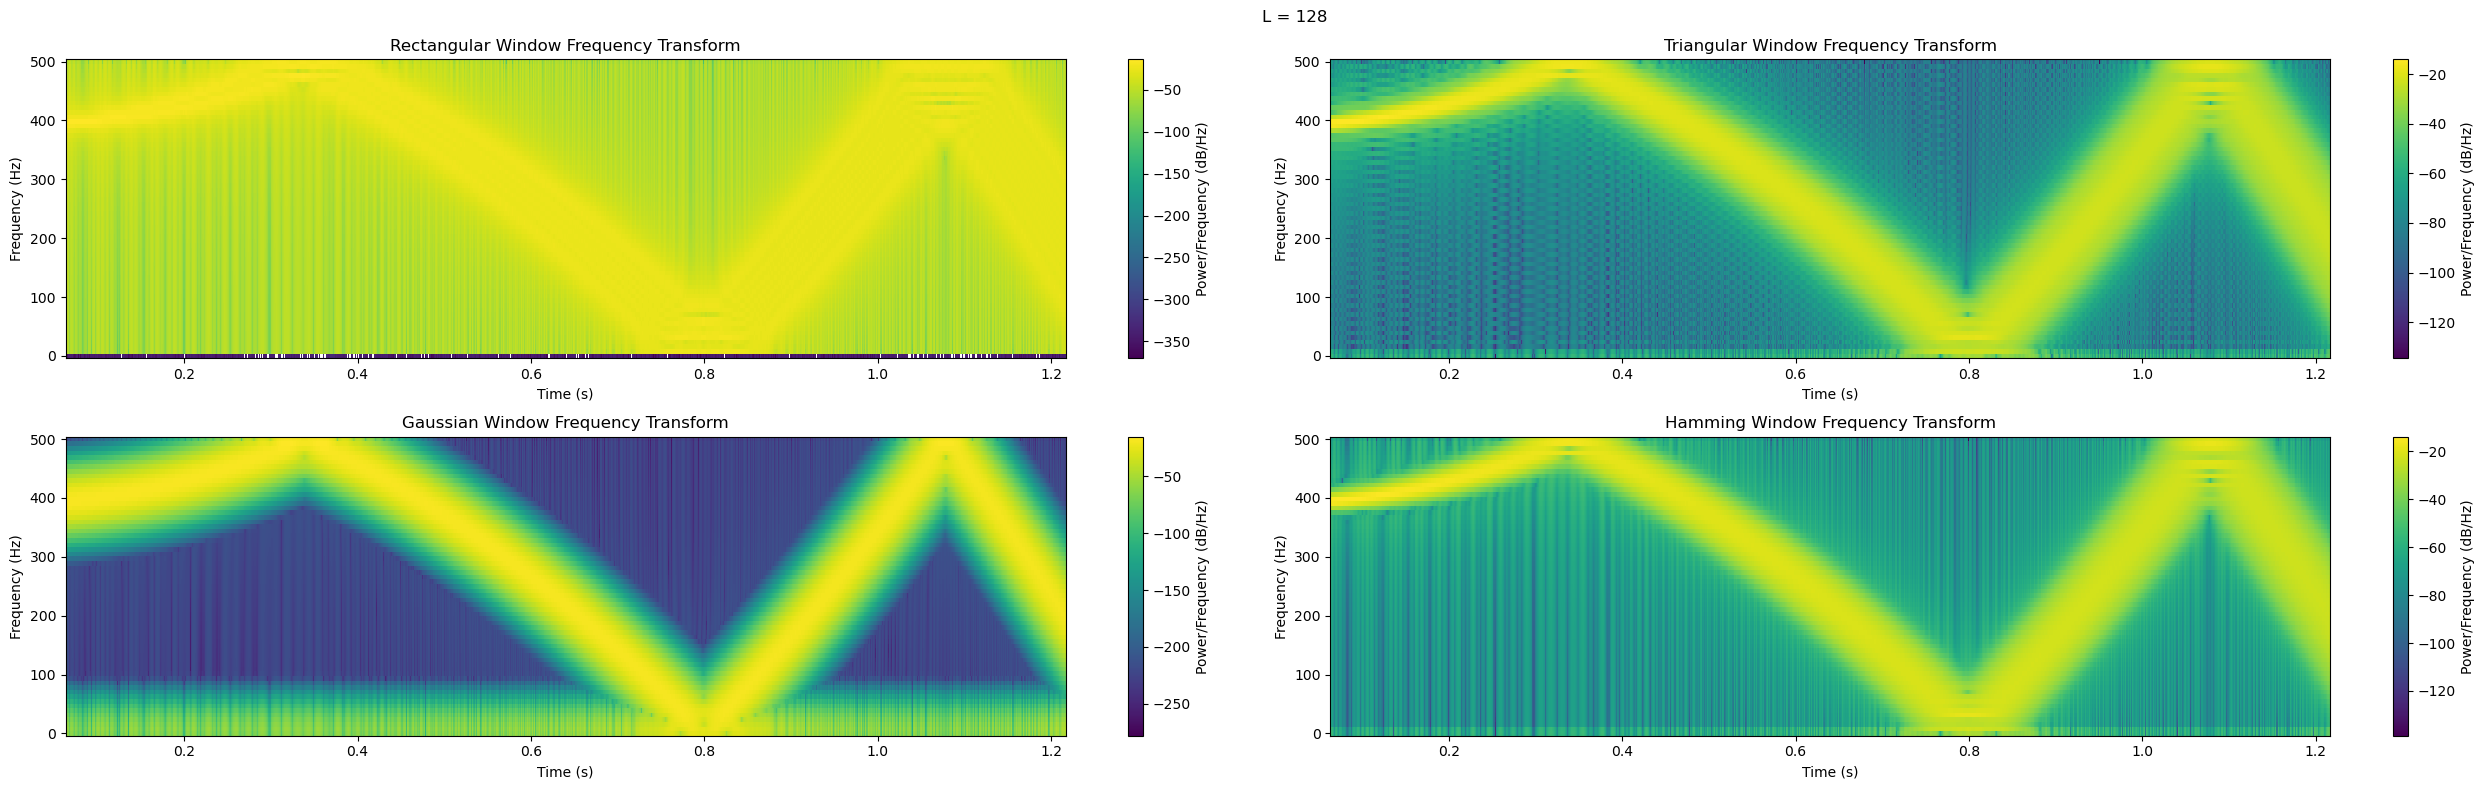

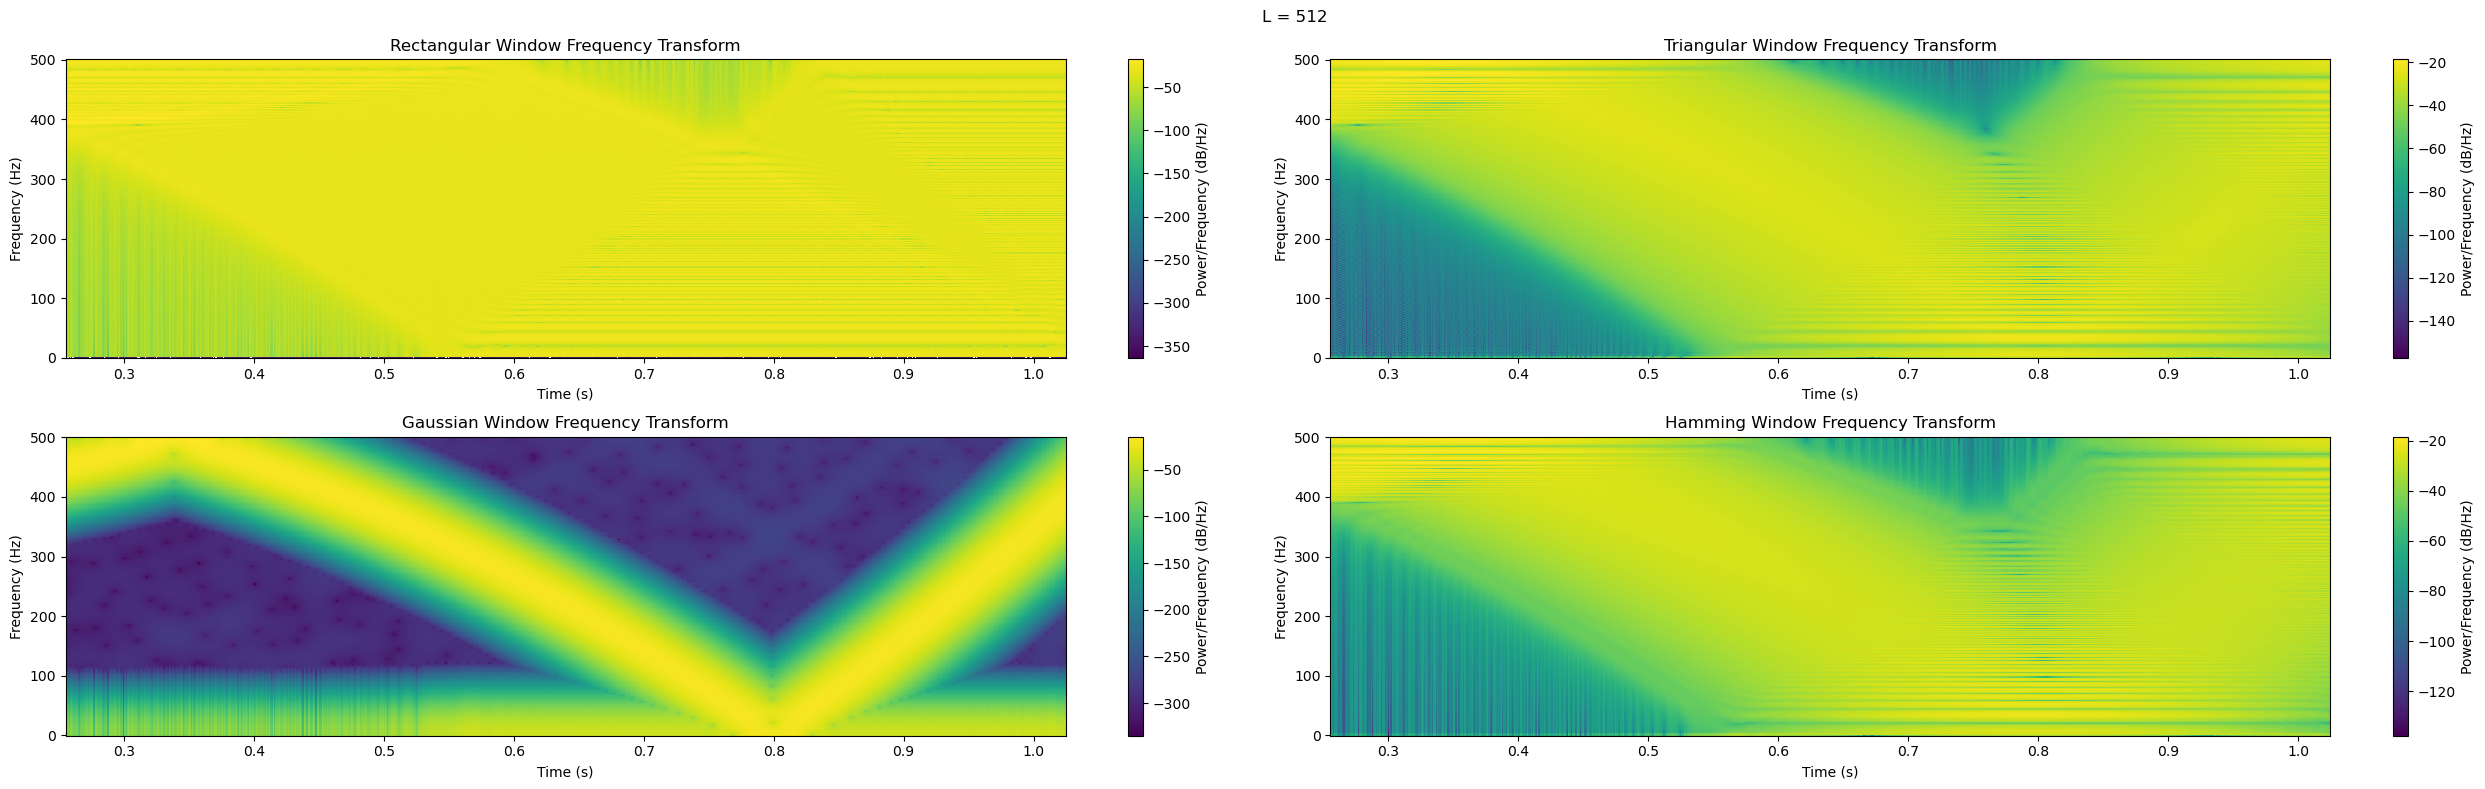

In [123]:
Ls = [32, 128, 512]

for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_49095/2576219053.py:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


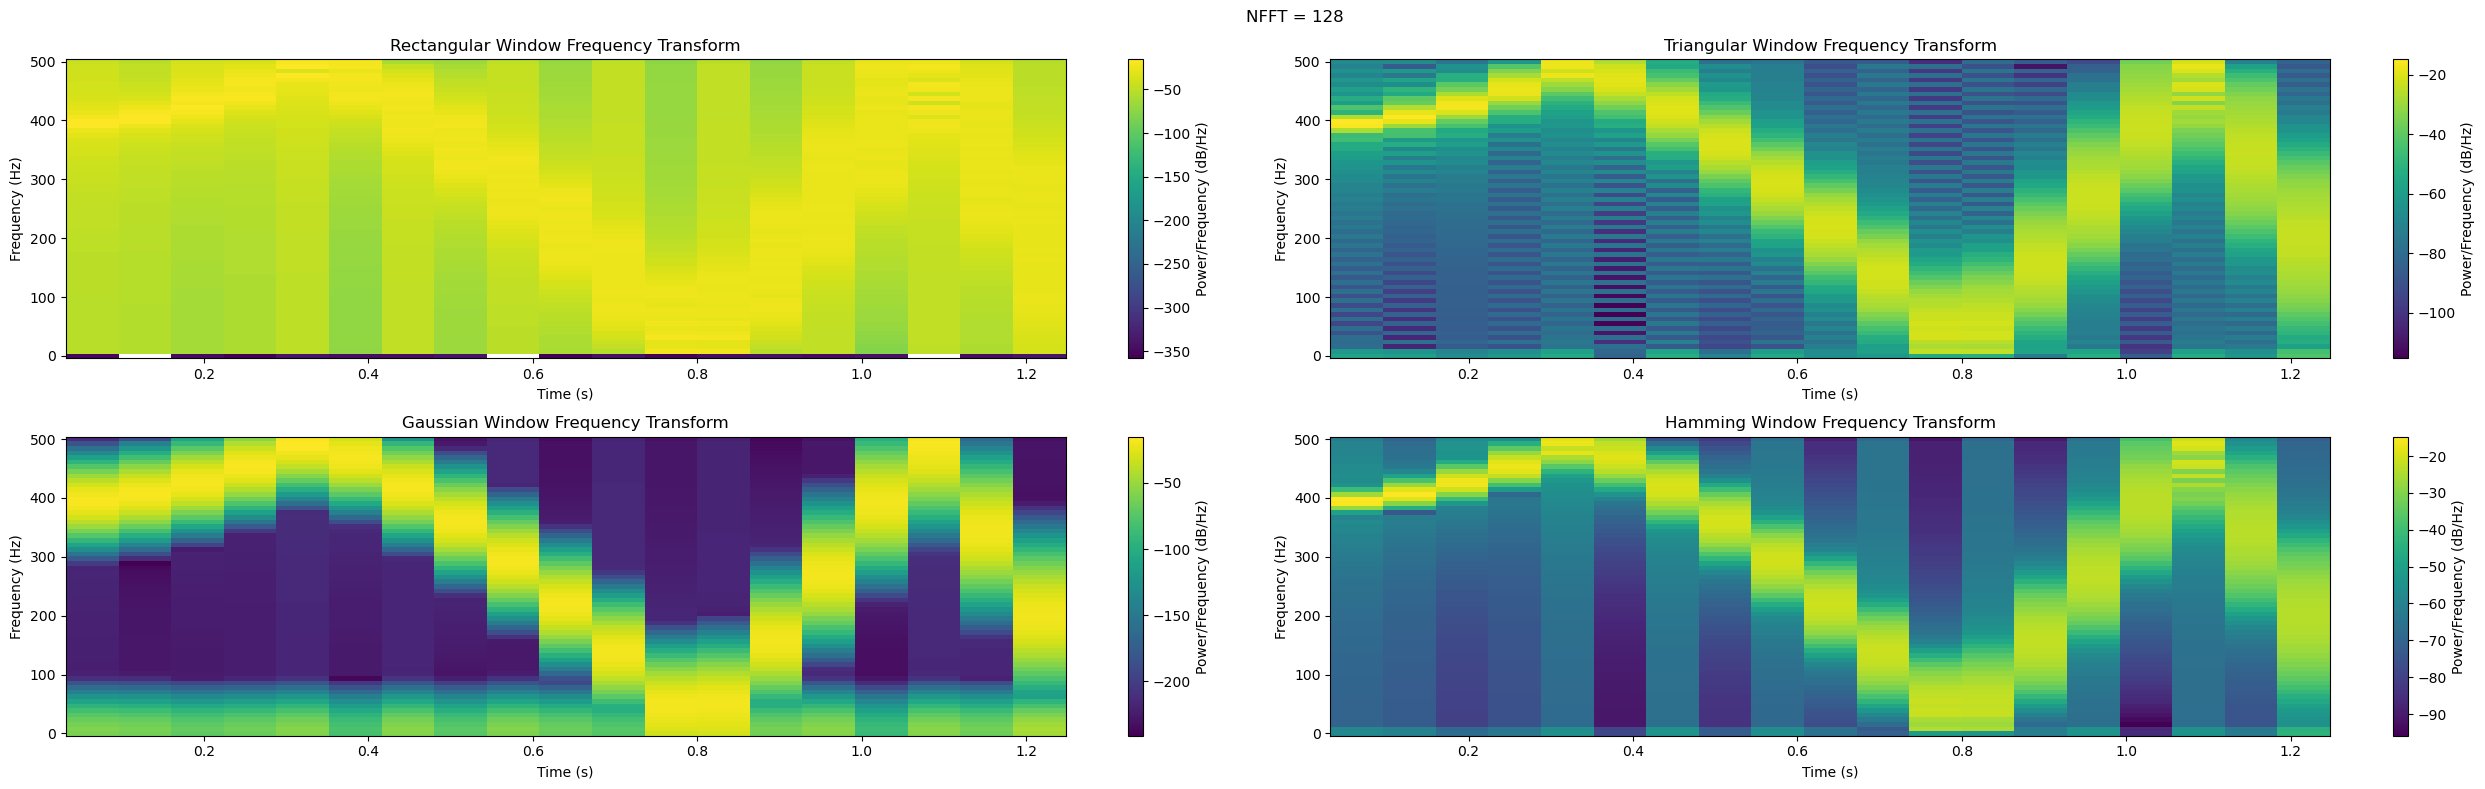

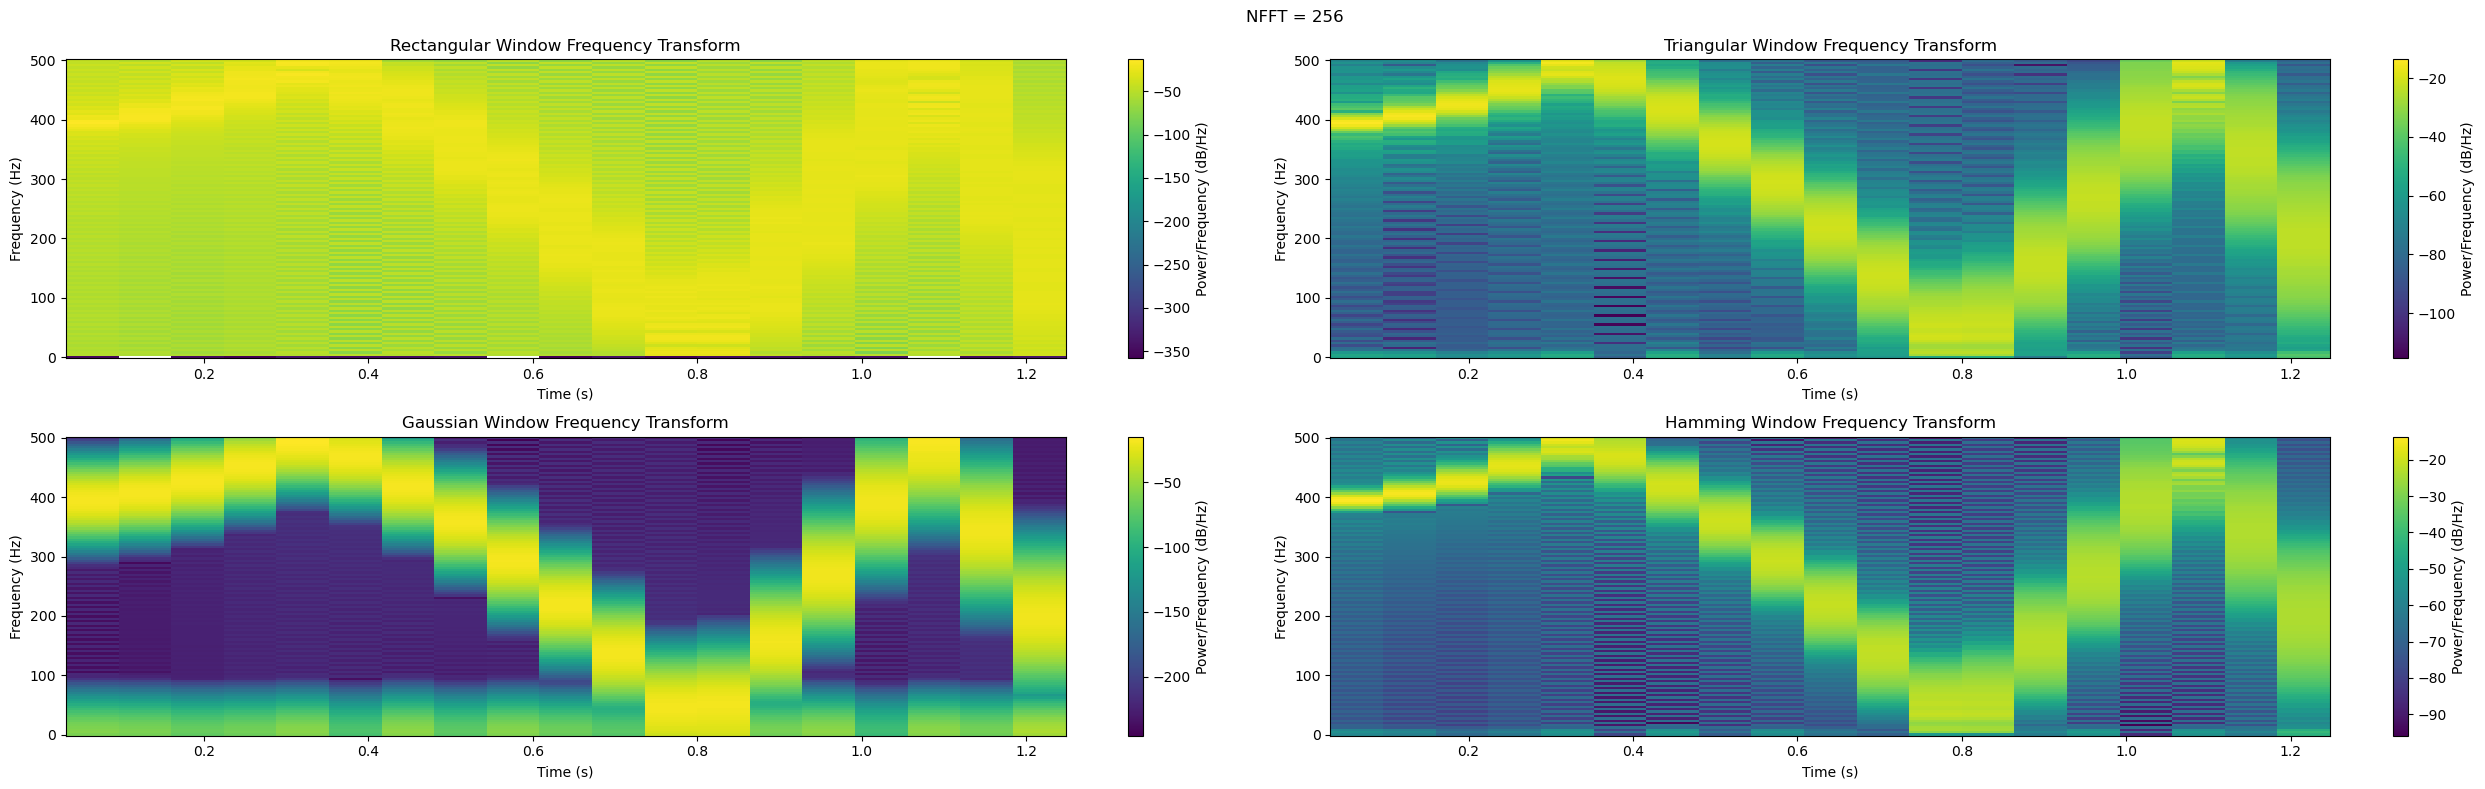

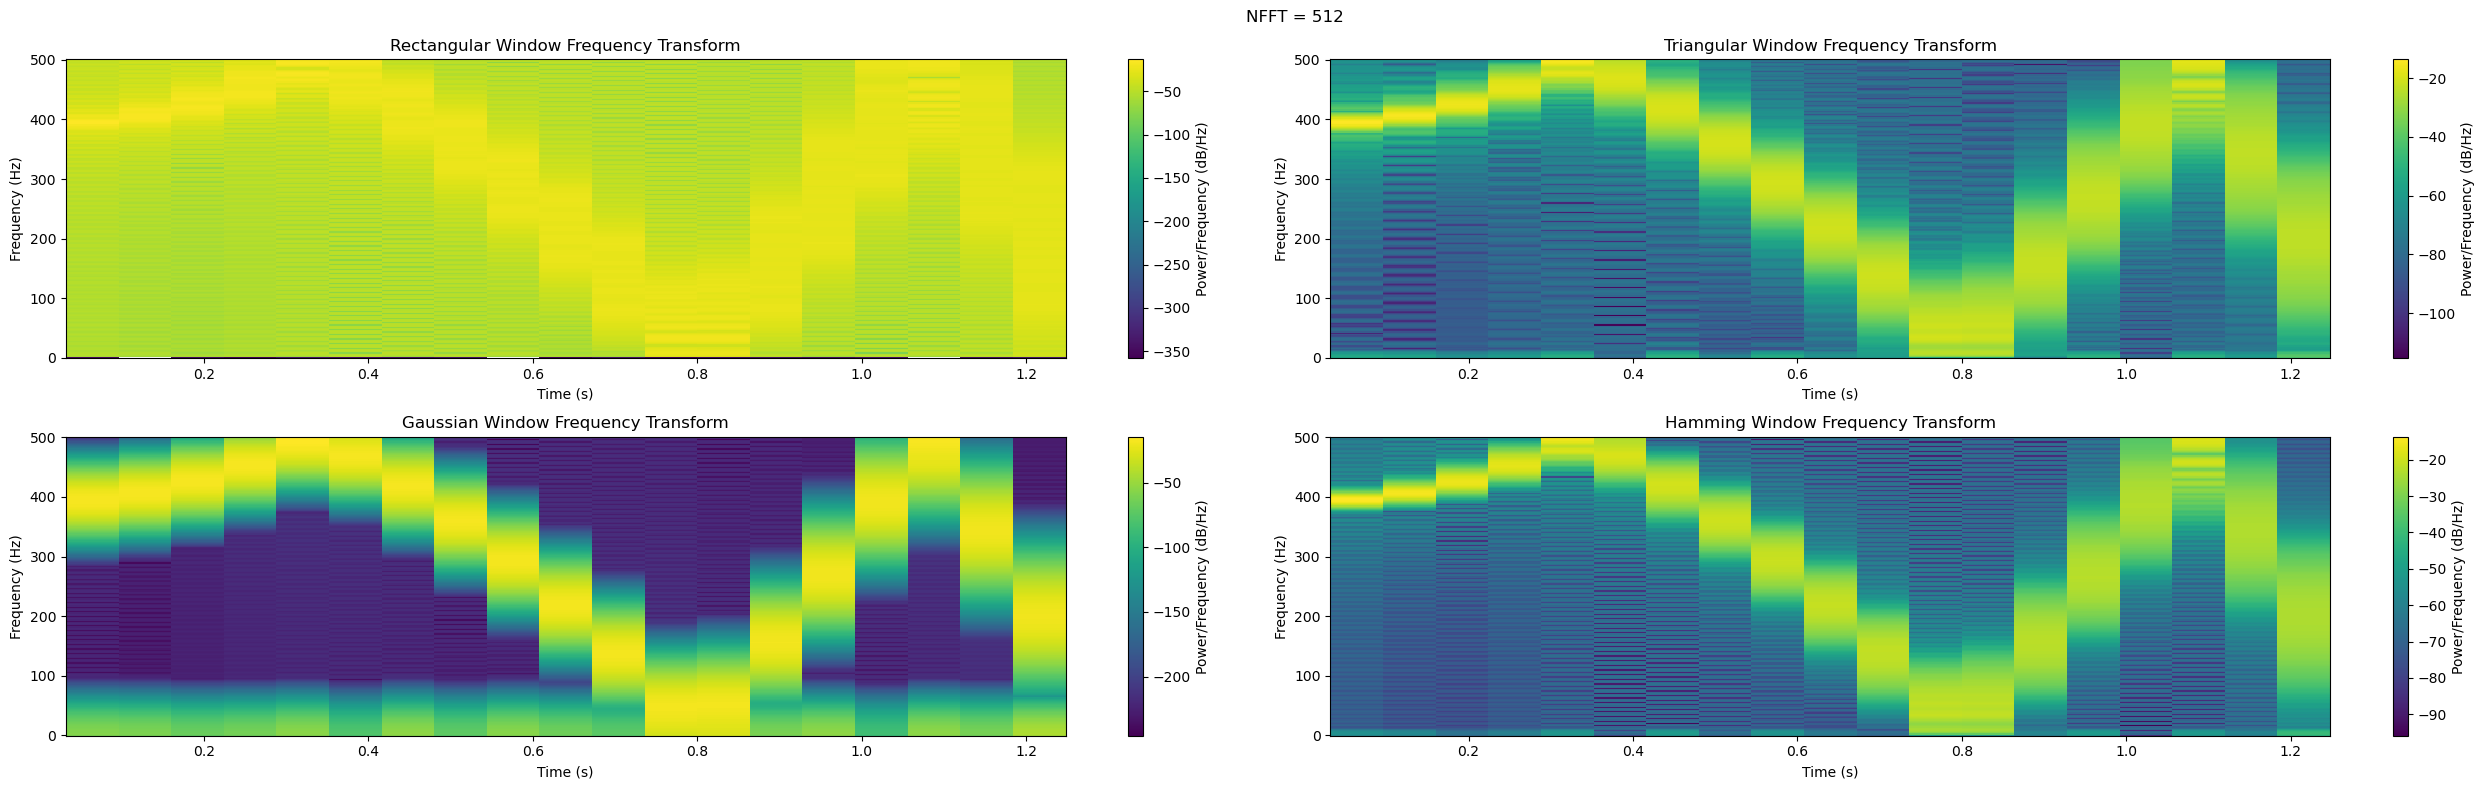

In [124]:
L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L/2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()
